
# Training a Decision Tree or a Random Forest on a classification problem, and compare the latter with using adaBoost

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université**


## 1. Decision Trees with SciKit-Learn on a very simple dataset

**We will first work on very simple classic dataset: Iris, which is a classification problem corresponding to determination of iris flower sub-species based on a few geometric characteristics of the flower.**

**Please FIRST READ the [*Iris DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).**
In this classification problem, there are 3 classes, with a total of 150 examples (each one with 4 input). Please **now execute code cell below to load and view the dataset**.


In [34]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Load Iris classification dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = " , iris.data.shape, "\n")
for i in range(0, 150) :
    print('Input = ', iris.data[i], ' , Label = ', iris.target[i] )


(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

**Building, training and evaluating a simple Decision Tree classifier**

The SciKit-learn class for Decision Tree classifiers is sklearn.tree.DecisionTreeClassifier.

**Please FIRST READ (and understand!) the [*DecisionTreeClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand all parameters of the contructor.**

**You can then begin by running the code block below, in which default set of parameter values has been used.** If graphical view works, look at the structure of the learnt decision tree.

**Then, check the influence of MAIN parameters for Decision Tree classifier, i.e.:**
 - **homegeneity criterion ('gini' or 'entropy')**
 - **max_depth**
 - **min_samples_split**
 
NB : Note that post-training *PRUNING* IS unfortunately *NOT* implemented in SciKit-Learn Decision-Trees :(

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10,
                       random_state=0)
Acuracy (on test set) =  0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45


 CONFUSION MATRIX
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


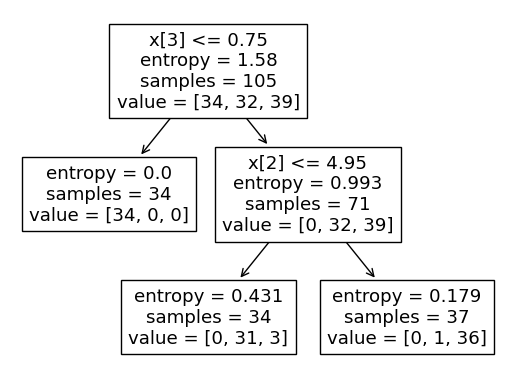

In [35]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Learn a Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=2, 
                                  min_samples_split=10, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=0, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf = clf.fit(X_train, y_train)

# Graphical view of learnt Decision Tree
tree.plot_tree(clf) 

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


## 2. Decision Trees on a  MORE REALISTIC DATASET: HANDWRITTEN DIGITS

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). Please **now execute code cell below to load the dataset, visualize a typical example, and train a Desicion Tree on it**. 
The original code uses a **voluntarily SUBOPTIMAL set of learning hyperparameters values, which reaches ~66% test acuracy. Try to play with them in order to improve acuracy.**


Number_of-examples =  1797

 Plot of first example


<Figure size 640x480 with 0 Axes>

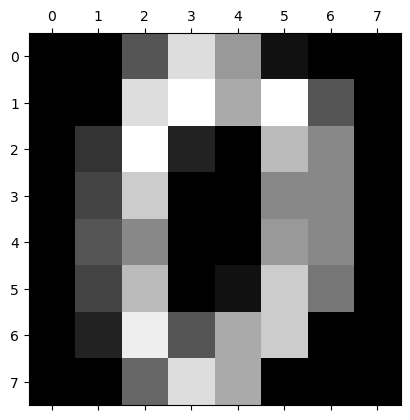

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=0)
Acuracy (on test set) =  0.5939933259176863
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.00      0.00      0.00        90
           2       0.30      0.90      0.45        92
           3       0.82      0.71      0.76        93
           4       0.65      0.93      0.76        76
           5       0.81      0.19      0.31       108
           6       0.84      0.80      0.82        89
           7       0.81      0.76      0.78        78
           8       0.00      0.00      0.00        92
           9       0.50      0.83      0.62        92

    accuracy                           0.59       899
   macro avg       0.57      0.61      0.55       899
weighted avg       0.57      0.59      0.54       899


 CONFUSION MATRIX


<Axes: >

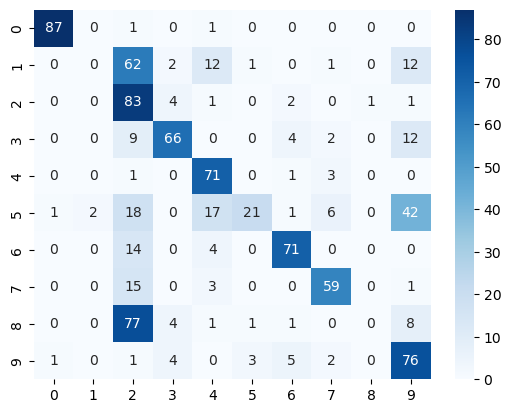

In [36]:
from sklearn.datasets import load_digits
import seaborn as sns

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Create and train a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=4, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=0, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clf = clf.fit(X_train, y_train)


# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')


__Question: According to the confusion matrices, what digits are the most confused with each other?__

__Answer: According to the confusion matrices, 1, 8 and 4 are the most confused digits with each other__ 

**Finally, find somewhat optimized values for the set of 3 main hyper-parameters for DecisionTree learning, by using GRID-SEARCH WITH CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=4,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]})
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Acuracy (on test set) =  0.8409343715239155
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.74      0.81      0.78        90
           2       0.97      0.77      0.86        92
           3       0.78      0.80      0.79        93
           4       0.80      0.83      0.81        76
           5       0.88      0.89      0.88       108
           6       0.86      0.93      0.90        89
           7       0.90      0.88      0.89        78
           8       0.71      0.71      0.

<Axes: >

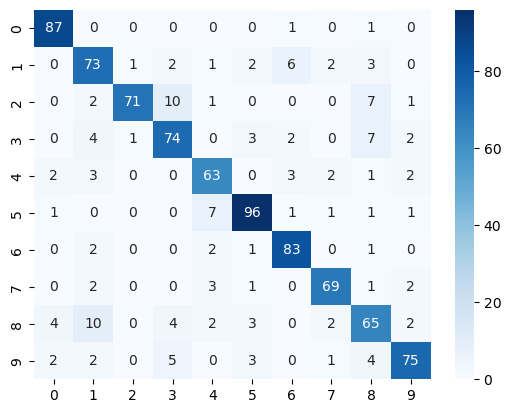

In [37]:

from sklearn.model_selection import GridSearchCV

hyper_params = {
    'criterion': ['gini', 'entropy' , 'log_loss'],
    'max_depth': [None, 2, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20]
}

grid_clf = GridSearchCV(estimator=clf, param_grid=hyper_params, cv=5)

grid_clf.fit(X_train, y_train)

print(grid_clf)
print(grid_clf.best_params_)
score = grid_clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, grid_clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')


__Question: What best value have you managed to reach for TEST accuracy of your DecisionTree after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer: 84.1%__ 


In order to improve result, the most natural step is to combine SEVERAL decision trees, using the Ensemble model called Random Forest: see below

## 3. Building, training and evaluating a Random Forest classifier

The SciKit-learn class for Random Forest classifiers is sklearn.ensemble.RandomForestClassifier.

**Please FIRST READ (and understand!) the [*RandomForestClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to understand all parameters of the contructor.**

**Then you can begin by running the code block below, in which default set of parameter values has been used.** As you will see, a RandomForest (even rather small) can easily outperform single Decision Tree. 

**Then, check the influence of MAIN parameters for Random Forest classifier, i.e.:**
 - **n_estimators (number of trees in forest)**
 - **max_depth**
 - **max_features (max number of features used in each tree)**


n_estimators= 10  max_depth= None  max_features= sqrt
RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=0)
Acuracy (on test set) =  0.9365962180200222
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       0.91      0.97      0.94        90
           2       0.93      0.96      0.94        92
           3       0.91      0.92      0.92        93
           4       0.96      0.99      0.97        76
           5       0.97      0.93      0.95       108
           6       0.97      0.96      0.96        89
           7       0.90      0.99      0.94        78
           8       0.91      0.82      0.86        92
           9       0.93      0.87      0.90        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899


 CONFUSION MATRIX
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  87   0  

<Axes: >

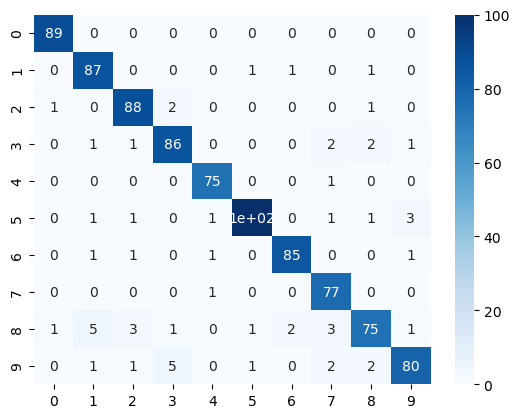

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='sqrt', 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=0, 
                             verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0)

clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=",clf.max_depth,
      " max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')



**Finally, find somewhat optimized values the set of 3 main hyper-parameters for RandomForest, by using CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session). __Put the code in the cell below:__

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]})
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Acuracy (on test set) =  0.9733036707452726
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       0.96      1.00      0.98        90
           2       1.00      0.98      0.99        92
           3       0.99      0.95      0.97        93
           4       0.99      0.97      0.98        76
           5       0.95      0.97      0.96       108
           6       0.98      0.99      0.98        89
           7       0.94      1.00      0.97        78
           8       0.98      0.91      0.94        92
   

<Axes: >

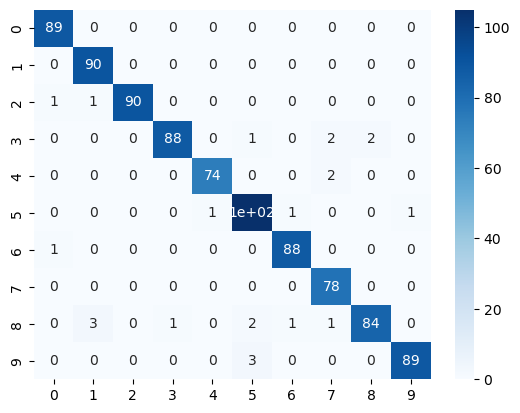

In [39]:


hyper_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'max_features': [None, 'sqrt', 'log2']
}

grid_clf = GridSearchCV(estimator=clf, param_grid=hyper_params, cv=5)

grid_clf.fit(X_train, y_train)

print(grid_clf)
print(grid_clf.best_params_)
score = grid_clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, grid_clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')

__Question: What best value have you managed to reach for TEST accuracy of your RandomForest after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer: 97.3%__

## 3. Building, training and evaluating an AdaBoost classifier

The SciKit-learn class for adaBoost is sklearn.ensemble.AdaBoostClassifier.

**Please FIRST READ (and understand!) the [*AdaBoostClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) to understand all parameters of the contructor.**

**Then begin by running the code block below, in which a default set of parameter values has been used.** 

**Then, check the influence of MAIN parameters for adaBoost classifier, i.e.:**
 - **estimator (ie type of Weak Classifier/Learner)** 
 - **n_estimators (number of boosting iterations, and therefore also number of weak classifiers)**
 - algorithm
 
**Finally, check which other types of classifiers can be used as Weak Classifier with the adaBoost implementation of SciKit-Learn.**
NB: in principle it is possible to use MLP classifiers as weak classifiers, but not with SciKit-learn implementation of MLPClassifier (because weighting of examples is not handled by its implementation).

Weak_learner: DecisionTreeClassifier(max_depth=6)
Weights of weak classifiers:  [3.43430654 5.24943694 5.28093413 5.38979532 4.63656091 4.75137856
 5.31929439 6.30395119 4.55206727 5.03434564 5.22876537 5.62640719
 5.33374289 4.25563935 5.72738071]


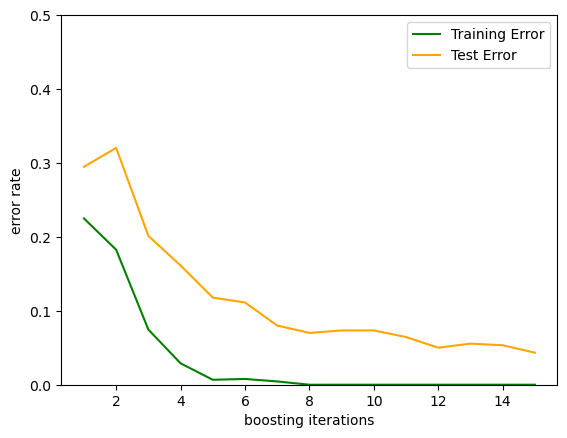

n_estimators= 15
Acuracy (on test set) =  0.9566184649610678
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.92      0.97      0.94        90
           2       0.98      0.93      0.96        92
           3       0.99      0.92      0.96        93
           4       1.00      0.95      0.97        76
           5       0.95      0.94      0.95       108
           6       0.99      0.99      0.99        89
           7       0.94      0.99      0.96        78
           8       0.89      0.92      0.91        92
           9       0.94      0.96      0.95        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


 CONFUSION MATRIX
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  87   0   0   0   1   0   0   1   1]
 [  1   1  86   0   0   0   0   0   4   0]
 [  0   0   1  86   0   1   0   

<Axes: >

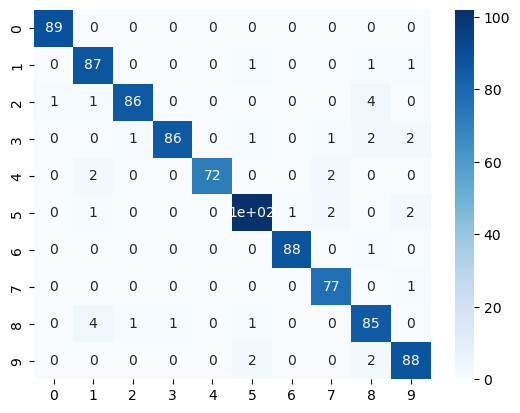

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train an adaBoost classifier using SMALL Decision Trees as weak classifiers
weak_learner = tree.DecisionTreeClassifier(max_depth=6)
clf = AdaBoostClassifier(weak_learner, n_estimators=15, learning_rate=1.0, algorithm='SAMME', 
                         random_state=0)
clf = clf.fit(X_train, y_train)
print("Weak_learner:", clf.estimator)
print("Weights of weak classifiers: ", clf.estimator_weights_)
      
# Plot training curves (error = f(iterations))
n_iter = clf.n_estimators
from sklearn.metrics import zero_one_loss
ada_train_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_pred, y_train)
ada_test_err = np.zeros((clf.n_estimators,))
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

# Evaluate acuracy on test data
print("n_estimators=", clf.n_estimators)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')


__Question:__ Looking at the training curves, you can see that **training error goes down to zero rather quickly, but that test_error still continues, after training error is zero, to diminish with increasing iterations**. __Is it normal, and why?__ (check the course!)

__Answer: Even when the training error goes down to zero, AdaBoost continues to modify the weights of the weak classifiers to improve their performance which helps improve test error.__

**Now, for the case of _DecisionTree_ weak classifiers, find somewhat optimized values of (max_depth, n_estimators) by using CROSS-VALIDATION.** __Put the code below:__

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=6),
                                          n_estimators=15, random_state=0),
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10],
                         'n_estimators': [50, 100, 200, 300]})
{'estimator__max_depth': 10, 'n_estimators': 200}
Acuracy (on test set) =  0.982202447163515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.98      1.00      0.99        90
           2       1.00      0.99      0.99        92
           3       0.98      0.95      0.96        93
           4       0.99      0.99      0.99        76
           5       0.98      0.97      0.98       108
           6       0.98      1.00      0.99        89
           7       0.96      1.00 

<Axes: >

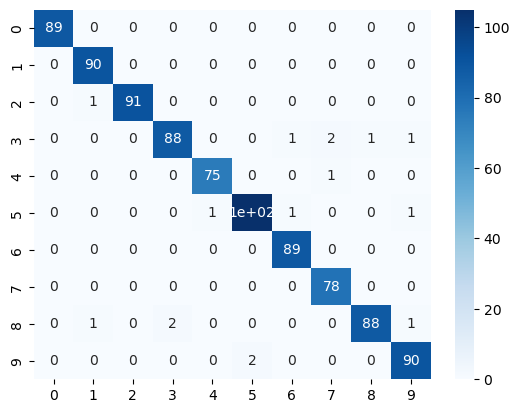

In [49]:


hyper_params = {
    'n_estimators': [50,100,200,300],
    'estimator__max_depth': [1,2,3,4,5,6,7,8,9,10], 
}


grid_clf = GridSearchCV(estimator=clf, param_grid=hyper_params, cv=5)

grid_clf.fit(X_train, y_train)

print(grid_clf)
print(grid_clf.best_params_)
score = grid_clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, grid_clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')


__Question: What best value have you managed to reach for TEST accuracy of your AdaboostClassifier after you properly gridSearched its hyper-parameters using CrossValidation?__

__Answer: 98.2%__